In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [4]:
import numpy as np
import pandas as pd

def compute_correlation_matrix(df):
   
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    data = numerical_df.to_numpy()
    means = np.mean(data, axis=0)
    centered_data = data - means 
    cov_matrix = np.cov(centered_data, rowvar=False, bias=False)
    std_devs = np.sqrt(np.diag(cov_matrix))
    corr_matrix = cov_matrix / np.outer(std_devs, std_devs)
    corr_df = pd.DataFrame(corr_matrix, index=numerical_df.columns, columns=numerical_df.columns)
    return corr_df
correlation_matrix = compute_correlation_matrix(df)
print(correlation_matrix)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


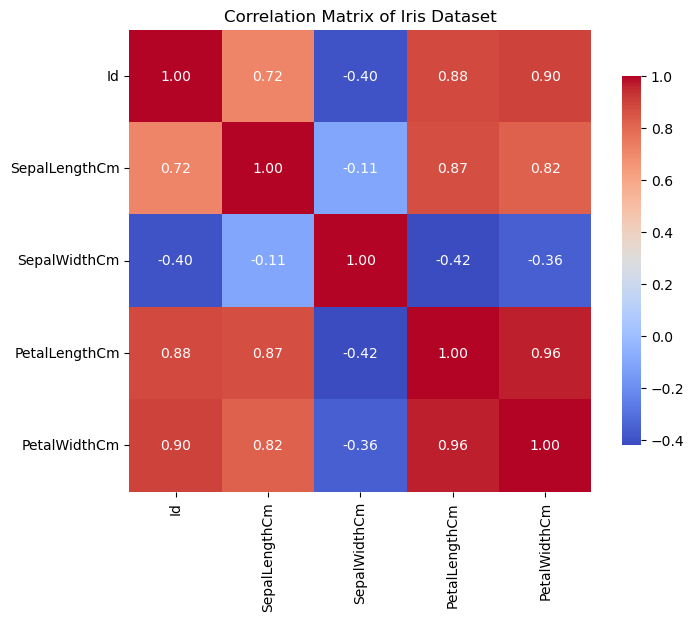

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

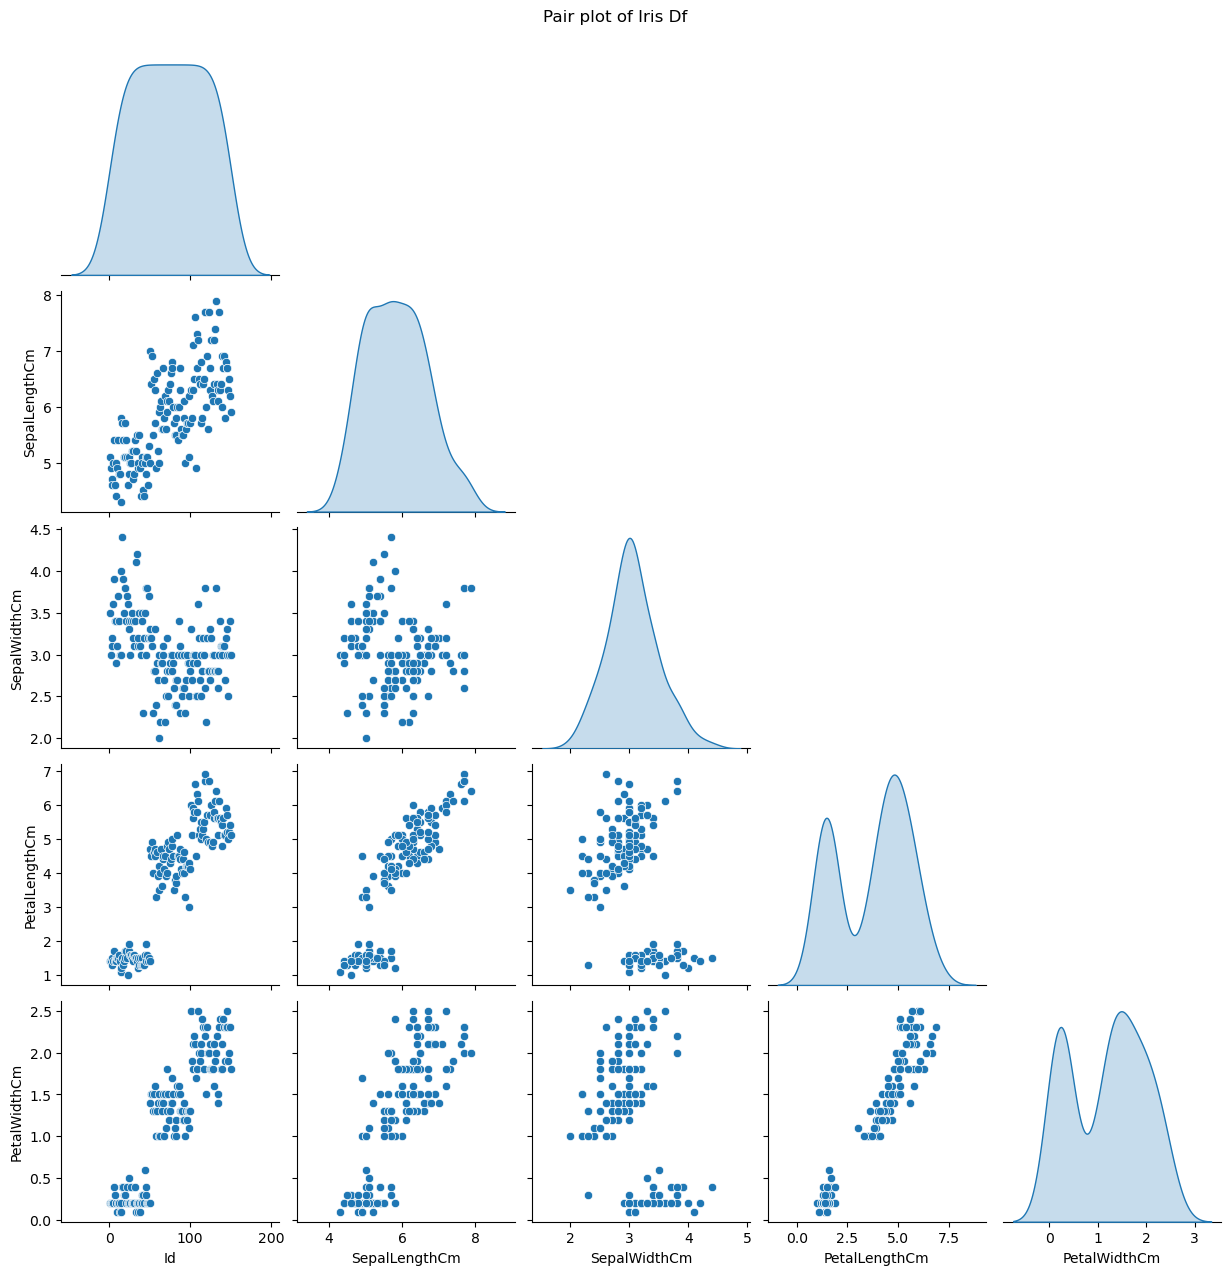

In [23]:
sns.pairplot(df,diag_kind="kde",corner=True)
plt.suptitle('Pair plot of Iris Df',y=1.02)
plt.show()